In [8]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn.datasets

# 50,100,150 images are with stickers # 19,20 images are test images
imug1 = mpimg.imread('50.png')
imug2 = mpimg.imread('20.png')
imug3 = mpimg.imread('100.png')
imug4 = mpimg.imread('19.png')

In [10]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
imug1.shape
imug2.shape
imug3.shape
imug4.shape

(32, 32, 3)

In [11]:
imug1_new=imug1.transpose(2,0,1).reshape(3,-1)
imug2_new=imug2.transpose(2,0,1).reshape(3,-1)
imug3_new=imug3.transpose(2,0,1).reshape(3,-1)
imug4_new=imug4.transpose(2,0,1).reshape(3,-1)

In [12]:
print(imug1_new.shape)
print(imug2_new.shape)
print(imug3_new.shape)
print(imug4_new.shape)

(3, 1024)
(3, 1024)
(3, 1024)
(3, 1024)


In [13]:
train1=pd.DataFrame(imug1_new)
train2=pd.DataFrame(imug3_new)
test1=pd.DataFrame(imug2_new)
test2 = pd.DataFrame(imug4_new)

In [18]:
tf1 = train1.transpose()
tf1.head()


,0,1,2
0,0.600000,0.603922,0.556863
1,0.654902,0.588235,0.490196
2,0.815686,0.756863,0.654902
3,0.674510,0.658824,0.596078
4,0.768627,0.741176,0.666667


In [19]:
tf2 = train2.transpose()
tf2.head()

,0,1,2
0,0.600000,0.603922,0.556863
1,0.654902,0.588235,0.490196
2,0.815686,0.756863,0.654902
3,0.674510,0.658824,0.596078
4,0.768627,0.741176,0.666667


In [20]:
tt1 = test1.transpose()
tt1.head()


,0,1,2
0,0.486275,0.556863,0.462745
1,0.490196,0.556863,0.462745
2,0.482353,0.552941,0.466667
3,0.478431,0.549020,0.462745
4,0.490196,0.552941,0.466667


In [21]:
tt2 = test2.transpose()
tt2.head()

,0,1,2
0,0.494118,0.568627,0.545098
1,0.454902,0.533333,0.521569
2,0.466667,0.541176,0.533333
3,0.447059,0.521569,0.505882
4,0.372549,0.454902,0.435294


In [31]:
tf2_new = tf2.rename(columns = {0:3,1:4,2:5}) 

In [32]:
tf2_new.head()

,3,4,5
0,0.600000,0.603922,0.556863
1,0.654902,0.588235,0.490196
2,0.815686,0.756863,0.654902
3,0.674510,0.658824,0.596078
4,0.768627,0.741176,0.666667


In [33]:
tf1_new = tf1

In [37]:
tf1_new[3] = tf2_new[3]

In [39]:
tf1_new[4] = tf2_new[4]

In [40]:
tf1_new[5] = tf2_new[5]

In [41]:
tf1_new.head()

,0,1,2,3,4,5
0,0.600000,0.603922,0.556863,0.600000,0.603922,0.556863
1,0.654902,0.588235,0.490196,0.654902,0.588235,0.490196
2,0.815686,0.756863,0.654902,0.815686,0.756863,0.654902
3,0.674510,0.658824,0.596078,0.674510,0.658824,0.596078
4,0.768627,0.741176,0.666667,0.768627,0.741176,0.666667


In [42]:
#### tf1_new = train_data and we can take here any one test data, here we are taking tt1

In [43]:
tf1_new.shape

(1024, 6)

In [44]:
tt1.shape

(1024, 3)

In [45]:
X_numpy = tf1_new.values
Y_numpy = tt1.values

In [46]:
model = linear_regressor.fit(X_numpy, Y_numpy)
Y_pred = linear_regressor.predict(X_numpy)

In [47]:
Y_pred

array([[0.55582327, 0.60045576, 0.5748496 ],
       [0.46841687, 0.4944528 , 0.45113313],
       [0.5283193 , 0.58120716, 0.5494752 ],
       ...,
       [0.20446998, 0.23370966, 0.13973224],
       [0.189493  , 0.22434387, 0.12772119],
       [0.19008034, 0.23324499, 0.13684213]], dtype=float32)

In [64]:
Y_pred.shape

(1024, 3)

In [66]:
Y_numpy.shape

(1024, 3)

In [48]:
model.intercept_

array([0.40683836, 0.3417655 , 0.28665102], dtype=float32)

In [49]:
model.coef_

array([[-0.48486915, -0.5699601 ,  8.573652  ,  1.1080253 , -2.0538452 ,
        -6.1320024 ],
       [-6.0182257 ,  3.9782836 ,  9.20182   ,  5.4902234 , -4.1216674 ,
        -8.012867  ],
       [-6.792741  ,  3.364945  , 10.234127  ,  6.3272038 , -3.898645  ,
        -8.636187  ]], dtype=float32)

In [67]:
import sklearn
from sklearn import metrics
import numpy as np
test_rmse= np.sqrt(metrics.mean_squared_error(Y_pred,Y_numpy))
print(test_rmse)

0.12456072


In [95]:
cutoff = 0.6
y_pred_classes = np.zeros_like(Y_pred)
y_pred_classes[Y_pred > cutoff] = 1

y_pred_classes

array([[0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [96]:
y_test_classes = np.zeros_like(Y_numpy)
y_test_classes[Y_numpy > cutoff] = 1

y_test_classes

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [97]:
y_pred_classes_df=pd.DataFrame(y_pred_classes)
y_test_classes_df=pd.DataFrame(y_test_classes)

In [98]:
pattern_count_test = y_test_classes_df[(y_test_classes_df[0]== 0) & (y_test_classes_df[1] == 0) & (y_test_classes_df[2] == 0)].count()

y_test_classes_df.rename(columns = {0:'R', 1:'G',2:'B'}, inplace = True)


print(pattern_count_test)

0    167
1    167
2    167
dtype: int64


In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_classes.argmax(axis=1), y_test_classes.argmax(axis=1))
cm

array([[980,   8],
       [ 34,   2]], dtype=int64)

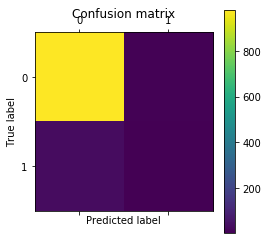

In [100]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [101]:
import os.path
import numpy as np
from PIL import Image

len(y_pred_classes.shape)

#img = Image.fromarray(Y_pred2, 'RGB')
final_image_array = np.resize(Y_pred,(32,32,3))

img = Image.fromarray(final_image_array, 'RGB')
img.show()

In [ ]:
#### learning curve#######

In [102]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(Ridge(), y_test_classes, y_pred_classes, "alpha",np.logspace(-7, 3, 3),cv=5)

In [103]:
train_scores

array([[0.50148697, 0.50140339, 0.50696175, 0.52544719, 0.54657379],
       [0.50148687, 0.50140336, 0.50696173, 0.52544721, 0.54657376],
       [0.15058436, 0.1441945 , 0.13473073, 0.1503652 , 0.15591224]])

In [104]:
valid_scores

array([[ 0.4134297 ,  0.5523194 ,  0.47460156,  0.44414243,  0.31273953],
       [ 0.41381995,  0.55236931,  0.47461408,  0.44414534,  0.31282623],
       [-0.04138286,  0.10881633,  0.01831213,  0.12468687,  0.04503898]])

In [105]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

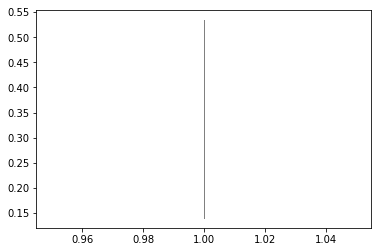

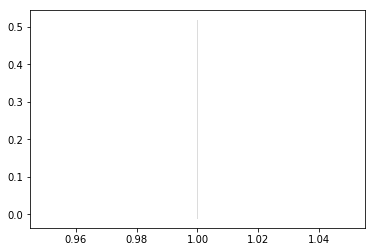

In [106]:
param_range = np.arange(1,3,5)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="gray")
plt.show()
plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, color="gainsboro")
plt.show()

In [107]:
from sklearn.metrics import r2_score
r2_score(y_test_classes,y_pred_classes)

0.39384233376238703